## Our goal is predicting the price of each house in different part of california 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


In [4]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### total rooms(20433) and ocean_proximity(object) need to be cleaned at preprocess stage .

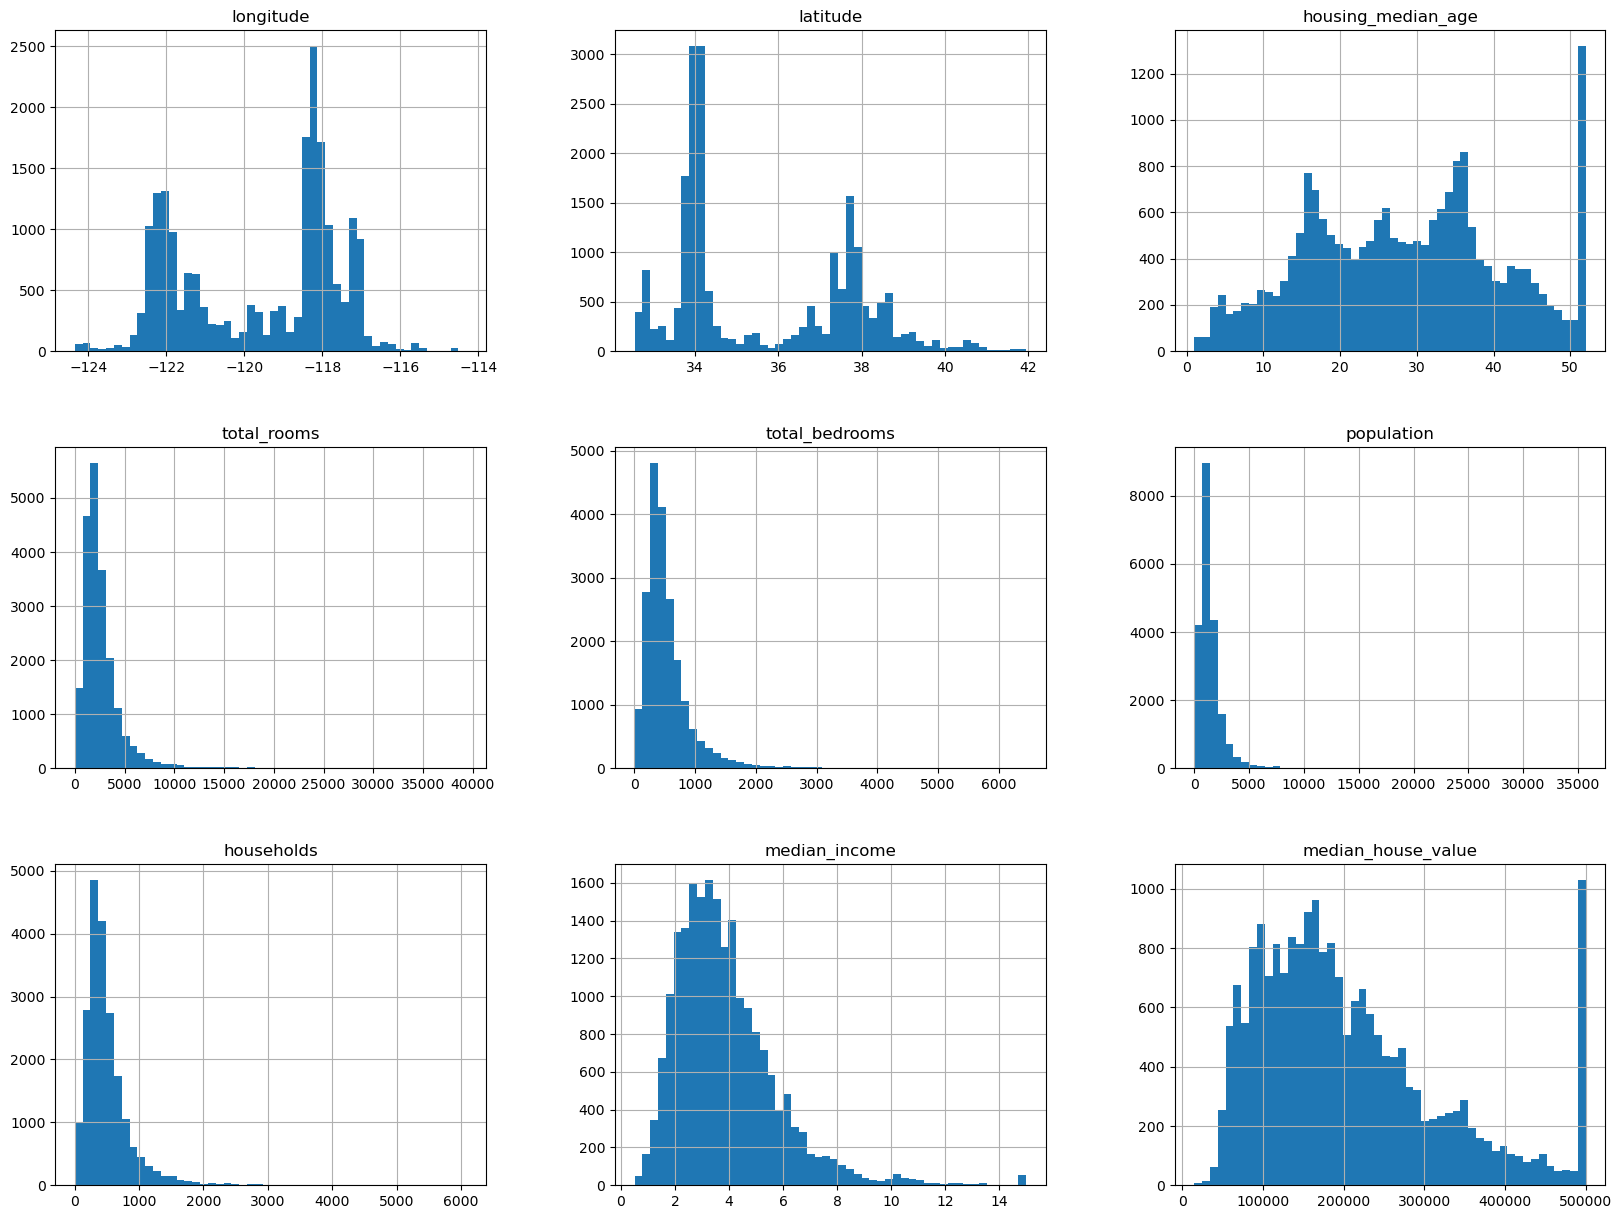

In [6]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# devide train and test data  

In [8]:
 train_set, test_set = train_test_split(housing, test_size=0.2, random_state= 2)

In [9]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [10]:
data = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

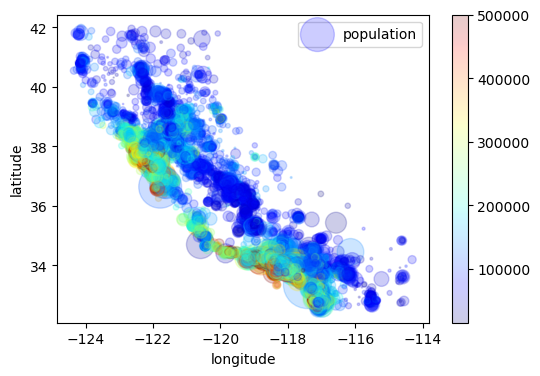

In [11]:
data.plot(kind = "scatter", x='longitude',
          y='latitude',s= data['population']/30, 
          label='population', c= data['median_house_value'], 
          cmap= plt.get_cmap('jet'),
          figsize=(6,4),alpha= 0.2)

 standard correlation coefficient ( pierson R) it shows amount between[-1, 1]
 rabete khati beyne vizhegiha


because ocean_proximity column has string we should consider only numeric


In [12]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Sort correlations with respect to the column "median_house_value"
sorted_corr = corr_matrix["median_house_value"].sort_values(ascending=False)

#corr_matrix = data.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

print(sorted_corr)


median_house_value    1.000000
median_income         0.689659
total_rooms           0.133218
housing_median_age    0.108626
households            0.063245
total_bedrooms        0.047478
population           -0.027441
longitude            -0.046754
latitude             -0.143970
Name: median_house_value, dtype: float64


here we can see only median_income is dependent to ===> 
median_house_value because the others amount are close to 0 not 1

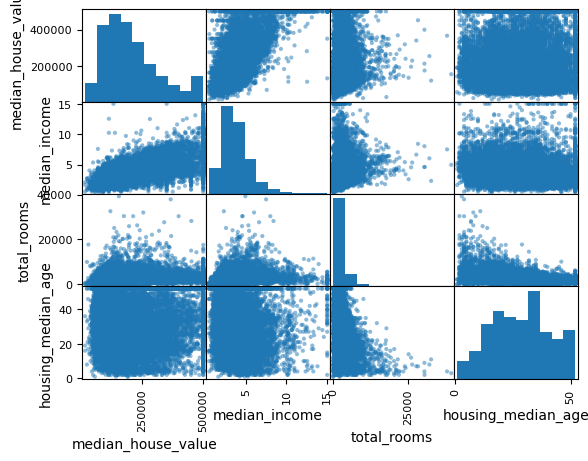

In [13]:
from pandas.plotting import scatter_matrix
featuers = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[featuers])
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

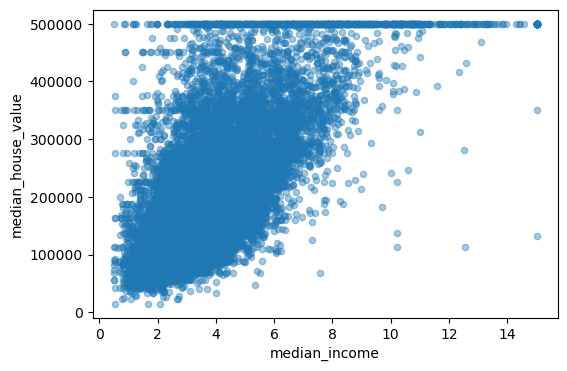

In [14]:
data.plot(kind = "scatter", x='median_income',
          y='median_house_value',
          figsize=(6,4),alpha= 0.4)

** note ** : 
- the houses price 500,000 here is showing that they
- rounded the price so we should keep that in mind

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [16]:
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4.443645,0.255262,3.350120
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,5.976471,0.171752,2.535294
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4.088785,0.244571,4.350467
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2.740088,0.368167,2.629956
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,5.166667,0.194069,3.037634


In [18]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Sort correlations with respect to the column "median_house_value"
sorted_corr = corr_matrix["median_house_value"].sort_values(ascending=False)

#corr_matrix = data.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

print(sorted_corr)

median_house_value                1.000000
median_income                     0.689659
total_rooms_per_households        0.157994
total_rooms                       0.133218
housing_median_age                0.108626
households                        0.063245
total_bedrooms                    0.047478
population                       -0.027441
population_per_households        -0.027454
longitude                        -0.046754
latitude                         -0.143970
total_bedrooms_per_total_rooms   -0.259574
Name: median_house_value, dtype: float64


### total_rooms_per_households        0.158485     close to 1 ===> ok

### total_bedrooms_per_total_rooms   -0.257419     close to -1 ===> ok 

### population_per_households       -0.022030      not usable 

In [19]:
#prepare the data

In [20]:
df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Our algorythim should not have the null value.
### Here total_bedrooms:16336 and ocean_proximity:16512 non-null=> object should be cleaned

In [21]:
df_num = df.drop("ocean_proximity", axis=1)

In [22]:
# with the code below those rows with null values in total_bedrooms column will be removed

we have 3 options here :   
1-drop_rows (we lose some data) ==> df_num = df_num.dropna(subset=["total_bedrooms"])   
2-drop_column (we lose big data) ==> df_num,drop("total_bedrooms", axix =1)   
3- replace data ==> median = df_num["total_bedrooms"].median()   
                    df_num["total_bedrooms"].fillna(median)   

option 3 is more reasonable here

In [23]:
# find null value in all columns and replace it by : median, mean,...
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_num)
x = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(x, columns=df_num.columns)
df_num_impute_tr.info()
df_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_r

succesfully all total_bedrooms:16336 non-null changed to total_bedrooms:16512 non-null

In [24]:
# custom transformers

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin


In [26]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 #index of columns

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
        poplulation_per_household = x[:,population_ix] / x[:, household_ix]
        bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
        return np.c_[x, rooms_per_household, poplulation_per_household, bedrooms_per_room]

custom = CombineAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns =list(df_num_impute_tr.columns)
columns.append('rooms_per_household')
columns.append('poplulation_per_household')
columns.append('bedrooms_per_room')
data_custom_tr.columns = columns


In [27]:
data_custom_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,poplulation_per_household,bedrooms_per_room
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4.443645,3.350120,0.255262
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,5.976471,2.535294,0.171752
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4.088785,4.350467,0.244571
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,2.740088,2.629956,0.368167
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,5.166667,3.037634,0.194069
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,4.879098,2.590164,0.196136
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,5.011905,2.075397,0.209026
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,5.439619,2.279661,0.199611
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,6.045161,3.153226,0.171825
9,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,6.028871,2.850394,0.181106


### Feature scaling :
1- standardization     
2- normalization (between 0 , 1) good for convolutional Neural network. put us in limitation when we have outlyers

In [28]:
from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler() # ==> give us numpy arrey
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns= data_custom_tr.columns)

In [29]:
data_num_scaled_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,poplulation_per_household,bedrooms_per_room
0,-0.137635,0.534564,-1.795939,-0.357368,-0.156812,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.614630
1,0.879836,-0.909979,-1.637178,-0.276515,-0.450010,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.645984
2,-0.312201,0.455091,-0.287715,-0.799127,-0.769218,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.453255
3,0.620480,-0.713633,0.188566,-0.913406,-0.733750,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.318982
4,-0.830911,1.011403,-0.605236,-0.326201,-0.393262,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.309104


### using LabelEncoder to clean string values

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df['ocean_proximity']
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded, columns=['ocean_proximity'])
data_cat_encoded.head(10)

,ocean_proximity
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,4
8,1
9,4



in ocean_proximity we have 5 different strings or categories but after changing
them to 0 to 5 . we gonna face with the problem that python consider
relationship between these number and this issue missguide our algorythim but we do not want it.

### so we will use OneHotEncoding to fix this issue

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse_output=False)
data_cat_1hot_temp = encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_temp)
# Constructing feature names manually
categories = encoder_1hot.categories_[0]
feature_names = [f'prox_{category}' for category in categories]
data_cat_1hot.columns = feature_names

final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,poplulation_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.156812,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.614630,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.450010,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.645984,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.769218,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.453255,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.733750,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.318982,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.393262,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.309104,0.0,1.0,0.0,0.0,0.0
5,0.620480,-0.858555,0.267947,-0.118873,-0.170999,-0.147668,-0.034063,0.149805,-0.234129,-0.044848,-0.277896,1.0,0.0,0.0,0.0,0.0
6,0.565617,-0.755707,0.188566,-0.053377,-0.026765,-0.335905,0.007427,0.442011,-0.175860,-0.091931,-0.083315,1.0,0.0,0.0,0.0,0.0
7,1.243930,-1.396168,0.267947,1.125097,1.148391,0.619094,1.148390,0.141776,0.011800,-0.073248,-0.225448,0.0,0.0,0.0,0.0,1.0
8,0.116733,0.277445,-1.557798,0.498595,0.247517,0.448990,0.308226,0.178011,0.277483,0.006651,-0.644882,0.0,1.0,0.0,0.0,0.0
9,-1.449373,0.875831,-0.843376,-0.156816,-0.291589,-0.301366,-0.311524,0.533972,0.270335,-0.021047,-0.504784,0.0,0.0,0.0,0.0,1.0


# =============Pipe line our code============= 

In [32]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6  # index of columns

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]
        bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
        return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values

num_attrs = ["longitude", "latitude", "housing_median_age", "total_rooms",
             "total_bedrooms", "population", "households", "median_income"]

cat_attrs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=num_attrs + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room', 'prox_<1H OCEAN', 'prox_INLAND', 'prox_ISLAND', 'prox_NEAR BAY', 'prox_NEAR OCEAN'])
housing_prepared_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810,0.0,1.0,0.0,0.0,0.0


## ====Now let see how regression models work on our model=====

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

sample_data_prepared = housing_prepared_df.iloc[:4]
print('predictions:\t', lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print('labels:\t\t' , list(sample_labels))

predictions:	 [ 35948.11365309 315970.75227185  61237.85008003 152762.03983994]
labels:		 [72000.0, 274100.0, 58300.0, 200000.0]


## So now we need metrics to see how does it work

In [34]:
from sklearn.metrics import mean_squared_error

# RMSE => Root Mean Squared Error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68002.5992005227

## 68002.5992005227 is not good as LinearRegression (underfit)

## ===lets try decisionTree===

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

#### it shows 0 that means it predict 100 % correctly but it is not OK some thing is wrong.
#### we fix this by getting help from cross_val_score

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label,
                          scoring = 'neg_mean_squared_error', cv = 10) #cv here is doing the process 10 times randomly
trees_rmse_scores = np.sqrt(-scores) # neg_mean_squared_error is negative value so we multiple by a - to get positive

def display_scores(scores, model_name):
    print('=============', model_name,'=============')
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    print('====================================================')

display_scores(trees_rmse_scores, 'Decision Tree Regression')

============= Decision Tree Regression =============
Scores: [66453.34743918 71201.15912469 68645.64136947 71219.82101771
 68473.04005831 70565.54453326 72167.80043021 73692.97298435
 70360.77765873 72923.06402333]
Mean: 70570.31686392454
Standard Deviation: 2091.7572575963495


### Mean: 70570 . it is not what we like to see ==> Overfit

#### lets do cross_val_score for LinearRegression too !!!

In [48]:
linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_label, scoring = 'neg_mean_squared_error', cv = 10) 
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, 'Linear Regression')

============= Linear Regression =============
Scores: [69950.61650899 63993.05359694 66324.31912505 70399.13260056
 71946.10805597 68108.91634653 66321.73105565 66916.82419747
 68092.51266868 70485.9307219 ]
Mean: 68253.9144877732
Standard Deviation: 2313.9023397177834


### Mean: 68253.9144877732 :\

## ===========lets try Random Forest===========

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, 'Random Forest Regression')


============= Random Forest Regression =============
Scores: [51347.54223564 47663.28622985 46893.0783019  49432.87117065
 49748.13722388 48985.64292255 50490.86118982 51138.75765834
 50204.89243549 52684.76252683]
Mean: 49858.98318949621
Standard Deviation: 1641.0923510102234


## ================SVM Regression==================

In [51]:
from sklearn.svm import SVR


svm_reg = SVR(kernel='rbf')  # You can change the kernel as needed
svm_reg.fit(housing_prepared_df, df_label)
svm_scores = cross_val_score(svm_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores, 'Support Vector Machine Regression')


============= Support Vector Machine Regression =============
Scores: [121443.41707542 116772.60470861 115149.2251839  119471.32581975
 120968.66352251 119071.0044607  119458.37379333 114423.34893877
 117941.09633756 115702.03372689]
Mean: 118040.1093567448
Standard Deviation: 2319.5402282575983


## ================KNN Regression==================

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_reg.fit(housing_prepared_df, df_label)
knn_scores = cross_val_score(knn_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores, 'K-Nearest Neighbors Regression')


============= K-Nearest Neighbors Regression =============
Scores: [64481.44255508 58000.44924062 59625.77903842 61140.67927198
 62347.46942759 62364.60656792 62485.90924559 61370.76440199
 61693.54169106 64761.76488324]
Mean: 61827.240632349785
Standard Deviation: 1919.3187040865514


### best mean found by Random Forest that was : 49858.98318949621

 ### GridSearchCV is used to find the best combination of hyperparameters for RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,4,6,10,30], 'max_features':[2,6,8,15]}]
forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df, df_label)

print('Best Parameters: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)


Best Parameters:  {'max_features': 6, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=6, n_estimators=30)


# ============Final Step============

## >>>>>>>>> Test our model on our test set <<<<<<<<<<<

In [58]:
final_model = grid_search.best_estimator_
x = test_set.drop('median_house_value', axis=1)
y = test_set['median_house_value'].copy()
x_prepared = full_pipeline.transform(x)
final_predictions = final_model.predict(x_prepared)
final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


C:\Users\mdlho\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


50069.89574607738

### on average, our model's predictions are off 
### by approximately $50069.90 when compared 
### to the actual values of the median house prices in the test set.

## ======================= END ======================